In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Sampling from a normal distribution

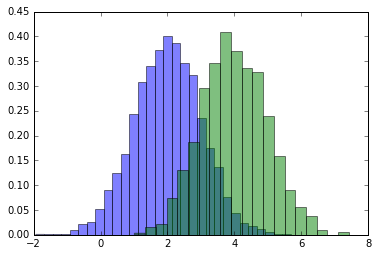

In [72]:
y = np.random.normal(loc=2, size=10000)
plt.hist(y, normed=True, bins=30, alpha=.5);
#plt.figure()
y = np.random.normal(loc=4, size=1000)
plt.hist(y, normed=True, bins=20, alpha=.5);


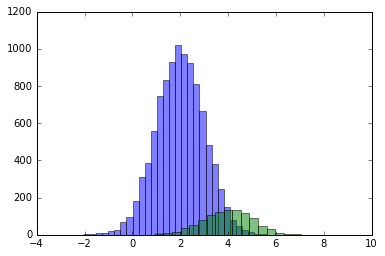

In [74]:
y = np.random.normal(loc=2, size=10000)
plt.hist(y,  bins=30, alpha=.5);
#plt.figure()
y = np.random.normal(loc=4, scale=1, size=1000)
plt.hist(y, bins=20, alpha=.5);


In [32]:
p = np.random.permutation(10)[:2]
#p = np.random.randint(len(y),size=len(y))
p

array([5, 6])

In [44]:
y[np.random.permutation(10)[:2]] += np.random.randint(10)
100+(y-100)%10

array([102, 107, 106, 105, 108, 102, 105, 108, 109, 103])

In [36]:
y

array([100, 103, 110, 103, 109, 109, 107, 105, 102, 107])

In [38]:
100+(y-100)%10

array([100, 103, 100, 103, 109, 109, 107, 105, 102, 107])

In [40]:
1%10

1

In [ ]:
m = np.random.normal(loc=3, scale=1, size=10000) 

In [ ]:
plt.hist(m, bins=30);

## Mixing samples from two distributions

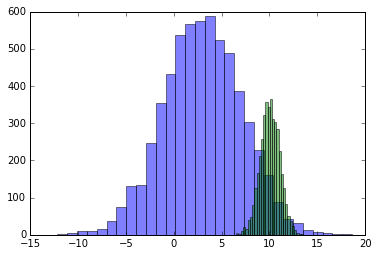

In [76]:
m1 = np.random.normal(loc=3, scale=4, size=6000)
m2 = np.random.normal(loc=10, scale=1, size=4000)
plt.hist(m1, bins=30, alpha=0.5);
plt.hist(m2, bins=30, alpha=0.5);

In [77]:
m = np.concatenate((m1, m2))
m.shape

(10000,)

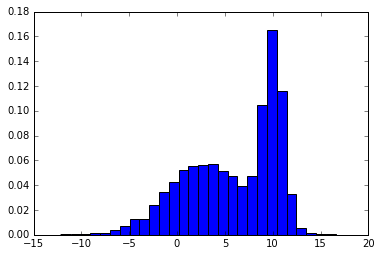

In [78]:
plt.hist(m, bins=30, normed=True);

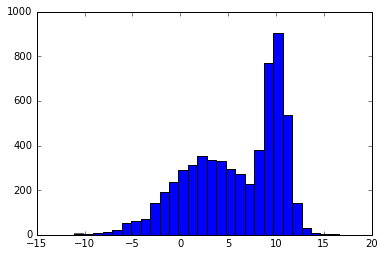

In [83]:
mm = np.random.permutation(m)
plt.hist(mm[:6000], bins=30);

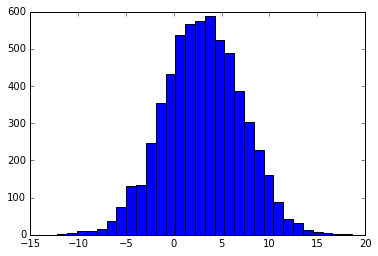

In [82]:
plt.hist(m[:6000], bins=30);


In [81]:
l = np.array([4,5,6,7])
print l
print np.random.permutation(l)

[4 5 6 7]
[6 7 5 4]


## Combining samples through an operation

In [92]:
m1 = np.random.normal(loc=3, scale=4, size=6000)
m2 = np.random.normal(loc=10, scale=5, size=4000)

In [93]:
np.mean(2*m1), np.std(2*m1)

(5.9022573833780507, 8.0079756900486281)

In [94]:
c = 2*m1+m2
c.shape

ValueError: operands could not be broadcast together with shapes (6000,) (4000,) 

In [ ]:
plt.hist(c, bins=30);

In [ ]:
np.mean(c), np.std(c)

In [ ]:
np.mean(2*m1), np.std(m1), np.std(2*m1)

## Adding noise to a signal

(0, 6.5)

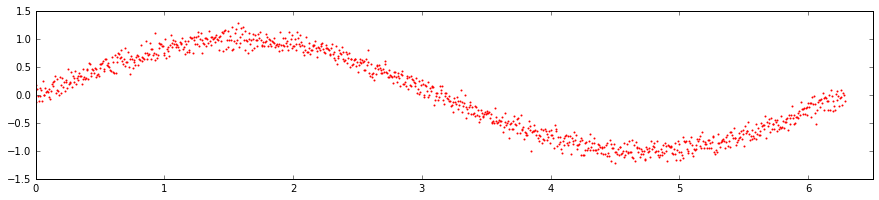

In [113]:
x = np.linspace(0,2*np.pi,1000)
s1 = np.sin(x)
m1 = np.random.normal(loc=0, scale=.1, size=len(x))
sr1 = s1 + m1
#plt.scatter(x,s, s=1, color="blue")
plt.figure(figsize=(15,3))
plt.scatter(x, sr1, s=1, color="red")
#plt.scatter(x, m1, s=1, color="blue")
plt.xlim([0,6.5])


(array([   4.,    2.,    8.,   12.,   32.,   35.,   65.,   87.,   96.,
         111.,  107.,  112.,   90.,   78.,   62.,   48.,   22.,   14.,
           7.,    8.]),
 array([-0.29784811, -0.26887085, -0.23989359, -0.21091633, -0.18193907,
        -0.15296181, -0.12398455, -0.09500729, -0.06603003, -0.03705277,
        -0.00807551,  0.02090175,  0.04987901,  0.07885627,  0.10783352,
         0.13681078,  0.16578804,  0.1947653 ,  0.22374256,  0.25271982,
         0.28169708]),
 <a list of 20 Patch objects>)

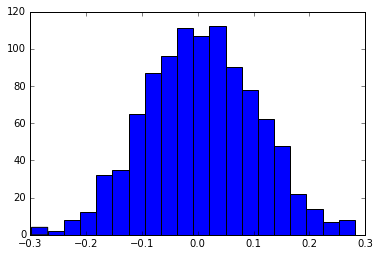

In [98]:
plt.hist(m1, bins=20)

## Reducing noise through windowed smoothing

(0, 6.5)

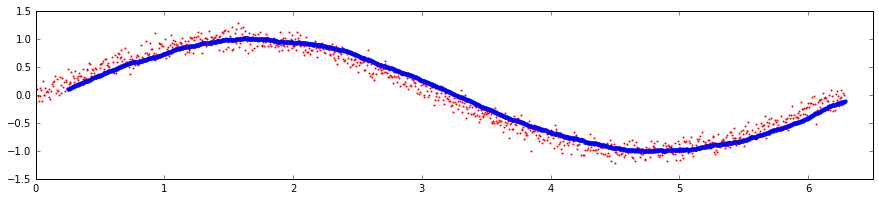

In [117]:
ws = 20
sm = np.zeros(len(sr1)-ws*2)
for i in range(ws*2,len(sr1)):
    sm[i-ws*2] = np.mean(sr1[i-ws*2:i])
    
plt.figure(figsize=(15,3))
plt.scatter(x, sr1, s=1, color="red")
plt.scatter(x[ws*2:len(sr1)], sm, s=10, color="blue")
plt.xlim([0,6.5])

## Computing spatial probabilities

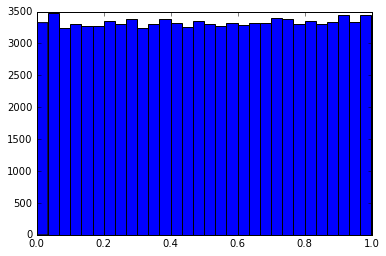

In [121]:
y = np.random.random(size=100000)
plt.hist(y, bins=30);

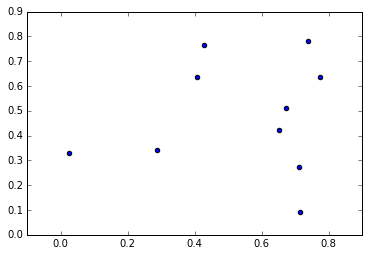

In [133]:
p = np.random.random(size=(10,2))
plt.scatter(p[:,0], p[:,1])

In [134]:
esquina = np.sum((p[:,0]>0.5)&(p[:,1]>0.5))
resto = len(p)-esquina
esquina, resto, 0.3**esquina * 0.7**resto

(3, 7, 0.002223566099999999)

In [136]:
p

array([[ 0.40758103,  0.63675568],
       [ 0.77565202,  0.63700772],
       [ 0.71207546,  0.2730726 ],
       [ 0.28623921,  0.34303932],
       [ 0.42865172,  0.76698427],
       [ 0.6719513 ,  0.51328814],
       [ 0.65200935,  0.42205529],
       [ 0.02397048,  0.32901138],
       [ 0.71580962,  0.09181939],
       [ 0.73829467,  0.78237841]])

In [139]:
p[:,0]>0.5

array([False,  True,  True, False, False,  True,  True, False,  True,  True], dtype=bool)

In [140]:
p[:,1]>0.5

array([ True,  True, False, False,  True,  True, False, False, False,  True], dtype=bool)

In [142]:
np.sum((p[:,0]>0.5)&(p[:,1]>0.5))

3